# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook 1 : Data munging

(Ungraded Mini-Project)

## Learning Objectives



At the end of the experiment, you will be able to


* understand the requirements for a “clean” dataset, ready for use in statistical analysis.

* use Python libraries like Pandas, Numpy, and Matplotlib to perform the  data-preprocessing steps accordingly.

* derive meaningful insights from the data


## Dataset

The dataset chosen for this experiment is **play store** dataset which is  publicly available and created with this [methodology](https://nycdatascience.com/blog/student-works/google-play-store-everything-that-you-need-to-know-about-the-android-market/)  

This dataset consists of 10841 records. Each record consists of 13 fields (features).

**For example**, one record consists of App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver.

## Problem Statement

Before we can derive any meaningful insights from the Play Store data, it is essential to pre-process the data and make it suitable for further analysis. This pre-processing step forms a major part of data wrangling (or data munging) and ensures better quality data. It consists of the transformation and mapping of data from a "raw" data form into another format so that it is more valuable for a variety of downstream purposes such as analytics and modelling. Data analysts typically spend a sizeable amount of time in the process of data wrangling (data munging), compared to the actual analysis of the data.

After data munging is performed, several actionable insights can be derived from the Play Store apps data. Such insights could help to unlock the enormous potential to drive app-making businesses to success.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/googleplaystore.csv
print("Data downloaded successfully!")

Data downloaded successfully!


#### Load the dataset

## Pre-processing

There are different steps involved in Data Preprocessing. These steps are as follows:

    1. Data Cleaning → In this step the primary focus is on
        -Handling missing data
        -Handling noisy data
        -Detection and removal of outliers
    
    2. Data Integration → This process is used when data is gathered from various data sources
    and data are combined to form consistent data. This data after performing cleaning is used
    for analysis.
    
    3. Data Transformation → In this step we will convert the raw data into a specified format
    according to the need of the model we are building. There are many options used for
    transforming the data as below:
        -Normalization
        -Aggregation
        -Generalization
        
    4. Data Reduction → After data transformation and scaling the redundancy within the data
    is removed and efficiently organizing the data is performed.

#1. Data Cleaning 

In [163]:
import warnings
warnings.simplefilter("ignore")

In [2]:
# YOUR CODE HERE
#Importing the libraries
import pandas as pd
import numpy as np

df = pd.read_csv("https://cdn.iisc.talentsprint.com/CDS/Datasets/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Task 1: Data Cleaning

* Check whether there are any null values and figure out how you want to handle them? 
  
    **Hint:** isnan(), dropna(), fillna()
* If there is any duplication of a record, how would you like to handle it?

    Hint: [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Are there any non-English apps? How would you filter them?

* In the size column, multiply 1,000,000 with M in the cell and multiply by 1000 if we have K in the cell.

## 1.1 Handling Null Values. 

In [3]:
# YOUR CODE HERE
# 1. Check whether there are any null values and figure out how you want to hnadle them 
#Step1 : Listing first all the columns, and a high level check on which of the columns have null values.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<font color='green'>**Findings** : As from the previous code we can can that, the column **`Ratings`** have the highest number of missing values, then followed by `Current Version`, `Android Version`, `Type` and `Content Rating`.

**Strategy to handle Missing Value**

1. First Check : Do all the missing ratings, belong to a single app, or a couple of apps or are spread thin across the dataframe.

2. Second Check : If the first check, didn't give much insights, we repeat the same activity, with `Category` and `Genres`.</font>

In [4]:
df[df['Rating'].isna()]['App'].value_counts()

Free Blood Pressure                     3
Mcqueen Coloring pages                  2
Random Video Chat                       2
RT 516 VET                              2
Breastfeeding Tracker Baby Log          2
                                       ..
På sporet ABC (BM)                      1
RIV-BM FPV                              1
BM Tahmin: Ücretsiz İddaa Tahminleri    1
BM Interventi                           1
Parkinson Exercices FR                  1
Name: App, Length: 1464, dtype: int64

<font color='green'>**Done** :**First Check** : Do all the missing ratings, belong to a single app, or a couple of apps or are spread thin across the dataframe.\
**Outcome of First Check** : As, we can see from the output of the query `df[df['Rating'].isna()]['App'].value_counts()`, the App names do not give much of a collective information about the missing `Rating` Data.\
We now move ahead with our 2nd level of check.</font>

In [5]:
rating_cat = df[df['Rating'].isna()]['Category'].value_counts()
print(rating_cat.head())
print("The number of rows the dataframe rating_cat returns:",len(rating_cat))

FAMILY             225
BUSINESS           157
MEDICAL            113
TOOLS              109
PERSONALIZATION     78
Name: Category, dtype: int64
The number of rows the dataframe rating_cat returns: 32


In [6]:
rating_genres = df[df['Rating'].isna()]['Genres'].value_counts()
print(rating_genres.head())
print("The number of rows the dataframe rating_genres returns:",len(rating_genres))

Business         157
Medical          113
Tools            109
Entertainment     90
Education         81
Name: Genres, dtype: int64
The number of rows the dataframe rating_genres returns: 56


<font color='green'>**Done** :**Second Check** : Do all the missing ratings, belong to a single or a couple of `category` or `Genre`,  or are spread thin across the dataframe.</font>

<font color='green'>**Outcome of Second Check** : Yes, we select the `Genres` column, and replace the missing values of the Rating column, with average values of the `Ratings, grouped by Genres`.</font>

In [7]:
mean_rating_by_genres = df.groupby('Genres')['Rating'].mean()

In [8]:
mean_rating_by_genres['Action']

4.285474860335196

In [9]:
def customRating(rating,genre):

  if pd.isna(rating):
    return mean_rating_by_genres[genre]
  else:
    return rating

In [10]:
df['Rating'] = df.apply(lambda x: customRating(x['Rating'],x['Genres']),axis=1)

In [11]:
# Checking if all the Nan in Rating column were filled.
# We find below 5 rows, still missing value for Rating, as there are no other rows corresponding to the
# Genres ['Art & Design;Action & Adventure','Trivia;Education','Books & Reference;Creativity','Role Playing;Education']
# So, we manually fill the ratings column of these 5 rows, with the complete average of the rating column 
df[df['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
2111,Mcqueen Coloring pages,FAMILY,NaN,65,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
6829,Bu Hangi Firma?,FAMILY,NaN,8,26M,100+,Free,0,Everyone,Trivia;Education,"December 10, 2017",3.3.6z,4.0.3 and up
7629,Wuwu & Co.,FAMILY,NaN,9,77M,100+,Paid,$2.99,Everyone,Books & Reference;Creativity,"March 22, 2017",2.49,4.1 and up
9672,Masha and the Bear - Hair Salon and MakeUp Games,FAMILY,NaN,1,83M,100+,Paid,$2.49,Everyone,Role Playing;Education,"March 5, 2018",1.0.1,4.1 and up


In [12]:
df['Rating'].mean()

4.191607512926401

In [13]:
rating_mean_val  = df['Rating'].mean()
df.at[23,'Rating'] = rating_mean_val
df.at[2111,'Rating'] = rating_mean_val
df.at[6829,'Rating'] = rating_mean_val
df.at[7629,'Rating'] = rating_mean_val
df.at[9672,'Rating'] = rating_mean_val

In [14]:
# Checking again .
df[df['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<font color='green'>Next value, having the most number of Nan values is `Current Version`</font>

In [15]:
df[df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.302564,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.089493,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.046794,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.346067,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [16]:
mode_current_ver = df.groupby('Genres')['Current Ver'].agg(pd.Series.mode)

In [17]:
def customCurrentVer(Current_Ver,Genre):
  if pd.isna(Current_Ver):
    return mode_current_ver[Genre]
  else:
    return Current_Ver

In [18]:
df['Current Ver'] = df.apply(lambda x:customCurrentVer(x['Current Ver'],x['Genres']),axis=1)

In [19]:
df[df['Genres']=='Art & Design'].groupby('Genres')['Current Ver'].count()

Genres
Art & Design    58
Name: Current Ver, dtype: int64

In [20]:
df[df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<font color='green'>
Rest of the missing value columns are :

1. `Android Version` : 3
2. `Type`            : 1
3. `Content Rating`  : 1

We will go ahead and drop these respective rows from the dataframe.</font>

In [21]:
df.dropna(subset = ['Android Ver','Type','Content Rating'], inplace=True)

In [22]:
# Recheck if all the Null values are taken care, from the 
# results below we can see that, it is taken care. 
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 1.2 Handling Duplicates

In [23]:
# checking the total record count of dataframe before dropping duplicates
print("Total number of records in the Apps Dataframe, before dropping duplicates",len(df))

#Drop duplicates taken the entireity of the dataframe
df.drop_duplicates()

# taking the count again, to see if we dropped any duplicate rows. 
print("Total number of records in the Apps Dataframe, before dropping duplicates",len(df))

Total number of records in the Apps Dataframe, before dropping duplicates 10837
Total number of records in the Apps Dataframe, before dropping duplicates 10837


<font color='green'>As, we can see, the number of rows are the same even after drop_duplicates(), because when we consider all the columns of the dataframe, then each row is unique. 
Now we try to take a subset of the important features, and then check if then we get some duplicates.</font>

In [24]:
columns = df.columns
print("Columns",columns)

Columns Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [25]:
df.duplicated(subset=['App','Category','Genres','Last Updated']).value_counts()

False    9775
True     1062
dtype: int64

<font color='green'>So, we have 1062 duplicate values. </font>

In [26]:
bools = df.duplicated(subset=['App','Category','Genres','Last Updated'])
df_bools = df[bools]
df_bools.sort_values(by = ['Last Updated','App','Genres'],ascending=False)
# We can start seeing some pattern of duplicates here, the idea of using 'Last Updated' 
# to sort first,(descending), to keep the first duplicate entry, and then delete the following 
# duplicate entries. 
# We are ready to apply sort followed by drop duplicates to the main "df" dataframe.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3022,WatchESPN,SPORTS,4.1,288809,6.6M,"10,000,000+",Free,0,Everyone,Sports,"September 27, 2017",2.5.1,4.4 and up
3067,WatchESPN,SPORTS,4.1,288809,6.6M,"10,000,000+",Free,0,Everyone,Sports,"September 27, 2017",2.5.1,4.4 and up
3094,WatchESPN,SPORTS,4.1,288809,6.6M,"10,000,000+",Free,0,Everyone,Sports,"September 27, 2017",2.5.1,4.4 and up
1626,Fashion in Vogue,LIFESTYLE,3.8,1797,6.8M,"100,000+",Free,0,Everyone,Lifestyle,"September 27, 2016",2.0,4.3 and up
1632,Fashion in Vogue,LIFESTYLE,3.8,1797,6.8M,"100,000+",Free,0,Everyone,Lifestyle,"September 27, 2016",2.0,4.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,Flow Free,GAME,4.3,1295606,11M,"100,000,000+",Free,0,Everyone,Puzzle,"April 11, 2018",4.0,4.1 and up
1887,Flow Free,GAME,4.3,1295625,11M,"100,000,000+",Free,0,Everyone,Puzzle,"April 11, 2018",4.0,4.1 and up
1981,Flow Free,GAME,4.3,1295625,11M,"100,000,000+",Free,0,Everyone,Puzzle,"April 11, 2018",4.0,4.1 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up


In [27]:
# first we will sort our df, with last updated column,App,Genres and as descending. 
df = df.sort_values(by = ['Last Updated','App','Genres'],ascending=False)
df.head()
df = df.drop_duplicates(subset =['App','Category','Genres','Last Updated'],keep='first')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6834,Kim Bu Youtuber?,FAMILY,4.390083,11,9.2M,"1,000+",Free,0,Everyone,Puzzle,"September 9, 2017",1.0,4.0 and up
10393,SnowMobile Parking Adventure,GAME,3.600000,12257,49M,"1,000,000+",Free,0,Everyone,Racing,"September 9, 2016",1.4,2.3 and up
9437,EI国际,FAMILY,4.700000,15,5.2M,"1,000+",Free,0,Everyone,Education,"September 9, 2016",1.0.4,4.0 and up
6983,Best Friends Dress Up & Makeup,FAMILY,3.700000,7664,44M,"500,000+",Free,0,Everyone,Casual;Pretend Play,"September 9, 2015",1.0.3,4.0.3 and up
7449,Sin City Hero : Crime Simulator of Vegas,GAME,4.100000,3371,78M,"100,000+",Free,0,Teen,Action,"September 8, 2017",1.1,4.0.3 and up


In [28]:
# Now we check if we have more duplicates and again check the count.
df.duplicated(subset=['App','Category','Genres','Last Updated']).value_counts()
# so duplicates are done

False    9775
dtype: int64

## 1.3 Filter non-English apps?

In [29]:
# Checking the count of non-englosh Apps 
# Filtered Dataframe containing only English Apps
print("Current Number of rows in the Apps DataFrame, without filtering out Non-English Apps",len(df))
count = len(df[df['App'].apply(lambda x: True if x.isascii() else False)])
print("Current Number of rows in the Apps DataFrame, after filtering out Non-English Apps",count)
#df[df['App'].apply(lambda x: True if x.isascii() else False)].head()

Current Number of rows in the Apps DataFrame, without filtering out Non-English Apps 9775
Current Number of rows in the Apps DataFrame, after filtering out Non-English Apps 9223


## 1.4 Multiply 1,000,000 ~ M | 1000 ~ K 

In [30]:
print("Value of one entry of the size column",df.loc[0,'Size'])
print("The Datatype of the single value",type(df.loc[0,'Size']))
print("The Datatype of the 'Size' column ",type(df.loc[:,'Size']))

Value of one entry of the size column 19M
The Datatype of the single value <class 'str'>
The Datatype of the 'Size' column  <class 'pandas.core.series.Series'>


In [31]:
# write a lambda function to replace
df['Size'] = df['Size'].apply(lambda x: int(float(str(x).replace('M', '')) * 1000000) if 'M' in str(x)  \
                              else int(float(str(x).replace('K', '') * 1000)) if 'K' in str(x) \
                              else 0.1)

In [32]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6834,Kim Bu Youtuber?,FAMILY,4.390083,11,9200000.0,"1,000+",Free,0,Everyone,Puzzle,"September 9, 2017",1.0,4.0 and up
10393,SnowMobile Parking Adventure,GAME,3.600000,12257,49000000.0,"1,000,000+",Free,0,Everyone,Racing,"September 9, 2016",1.4,2.3 and up
9437,EI国际,FAMILY,4.700000,15,5200000.0,"1,000+",Free,0,Everyone,Education,"September 9, 2016",1.0.4,4.0 and up
6983,Best Friends Dress Up & Makeup,FAMILY,3.700000,7664,44000000.0,"500,000+",Free,0,Everyone,Casual;Pretend Play,"September 9, 2015",1.0.3,4.0.3 and up
7449,Sin City Hero : Crime Simulator of Vegas,GAME,4.100000,3371,78000000.0,"100,000+",Free,0,Teen,Action,"September 8, 2017",1.1,4.0.3 and up


#Visualization

### Task 2: Perform the following:

##### Exercise 1: Find the number of apps in various categories by using an appropriate plot.

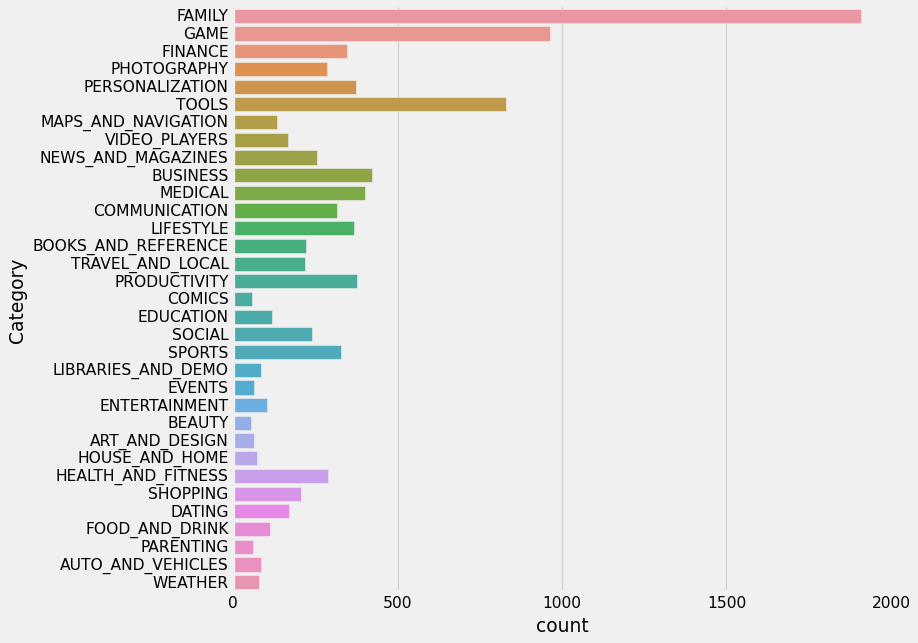

In [87]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')

sns.catplot(y="Category",  kind="count",
            data=df,height=8.27, aspect=11.7/8.27)

##### Exercise 2: Explore the distribution of free and paid apps across different categories

**Hint:** Stacked Bar Chart

In [ ]:
category_aggr_df = df.groupby(['Category','Type'])['App'].count().reset_index()
cat_free = category_aggr_df[category_aggr_df['Type']=='Free']
cat_paid = category_aggr_df[category_aggr_df['Type']=='Paid']

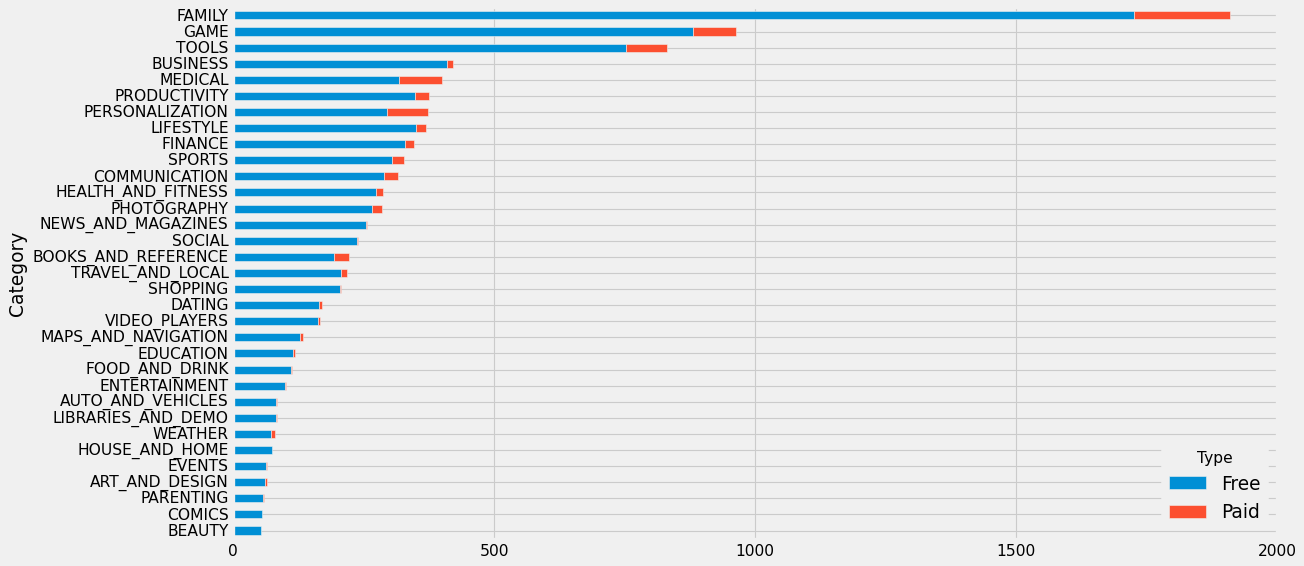

In [142]:
sub_df = df[['Category','Type']].groupby(['Category','Type']).size().unstack()
sub_df = sub_df.fillna(0)
# add the row wise sum for each company
sub_df['total'] = sub_df.sum(axis=1)

# sort
sub_df.sort_values('total', inplace=True)
# plot
ax = sub_df[['Free', 'Paid']].plot(kind='barh', stacked=True, figsize=[15, 8])

##### Exercise 3: Represent the distribution of app rating on a scale of 1-5 using an appropriate plot

**Hint:** histogram / strip plot

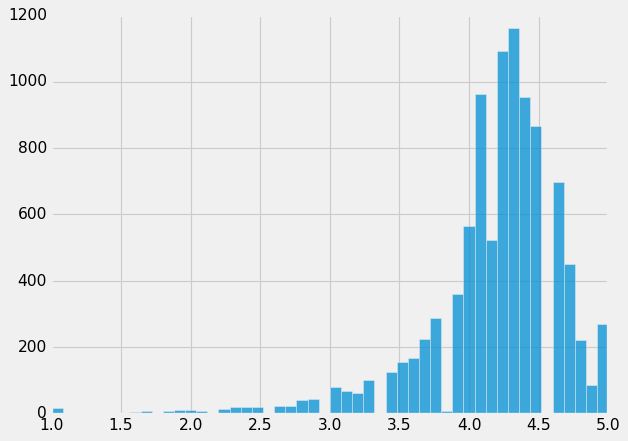

In [145]:
# YOUR CODE HERE
df['Rating'].hist(bins=50,alpha=0.75)

##### Exercise 4: Identify outliers of the rating column by plotting the boxplot category wise and Handle them.

**Hint:** Removing Outliers using z-score, quantile [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/) 

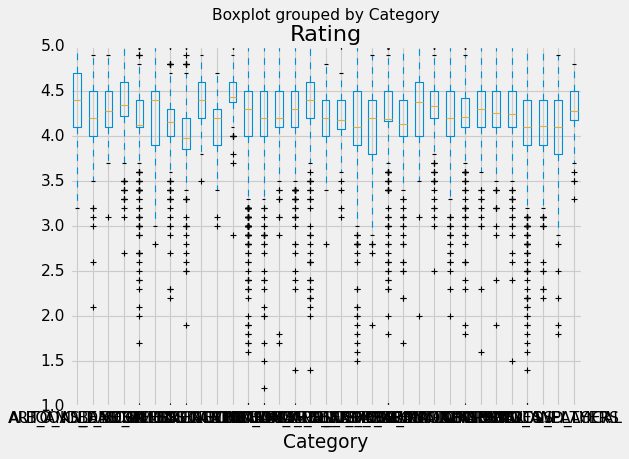

In [164]:
# YOUR CODE HERE

sub_df = df[['Category','Rating']]
columns = sub_df.loc[:,'Category'].unique()
sub_df.boxplot(by ='Category', column ='Rating')

Box Plot after removing the Outliers


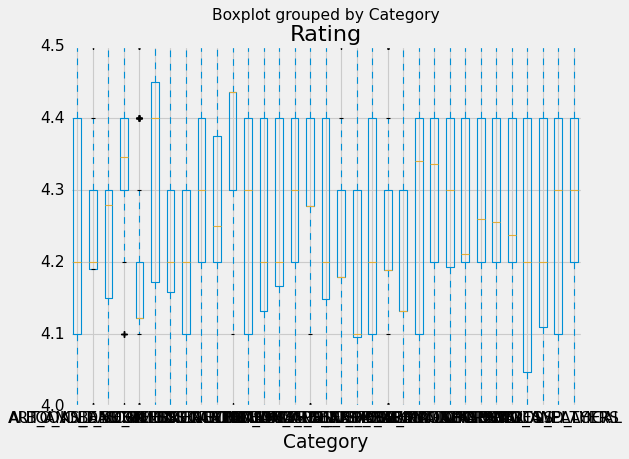

In [170]:
#Z-score
from scipy import stats
sub_df['z_score'] = stats.zscore(sub_df['Rating'])
#filter Z-score where z_score.abs() < 3
sub_df = sub_df[sub_df['z_score'].abs() < 1.5]
sub_df.boxplot(by ='Category', column ='Rating')
print("Box Plot after removing the Outliers")

##### Exercise 5: Plot the barplot of all the categories indicating no. of installs

Log scale for Installs


<BarContainer object of 33 artists>

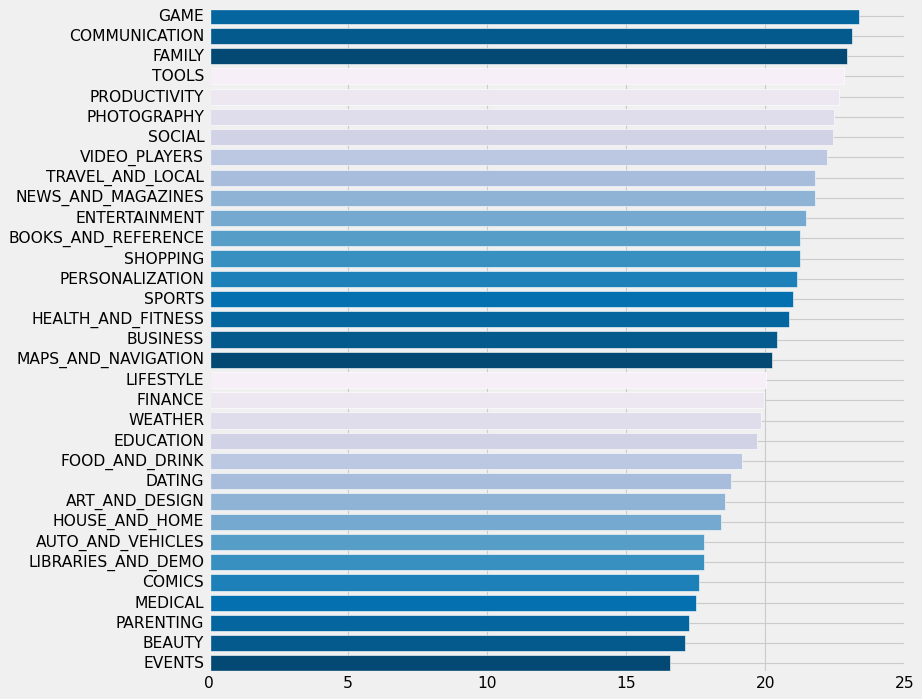

In [129]:
# YOUR CODE HERE
sub_df = df.groupby('Category')['Installs'].sum()
sub_df = np.log(sub_df)
sub_df = sub_df.sort_values()
index = sub_df.index
plt.figure(figsize = (10, 10))
#Bar plot
print("Log scale for Installs")
plt.barh(index, sub_df, edgecolor='white',color = sns.color_palette('PuBu_r',15))
#plt.xticks(rotation=70)
#plt.plot()

#Insights


##### Exercise 1: Does the price correlate with the size of the app?

  **Hint:** plot the scatterplot of `Size` and `Price`

In [34]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('fivethirtyeight')
#print(plt.style.available)
# 'classic',fivethirtyeight

In [35]:
# YOUR CODE HERE
y = df['Price'].apply(lambda x: float(str(x).replace('$',''))if '$' in str(x) else 0.1)
# Changing scale of logarithm, as logarithm is also an increasing function,
# Hence, behavior similar as real numbers 
x = np.log(df['Size']) # Only size we are using log as the sizes are in 1000 and Millions.

Text(0.5, 0, 'Size')

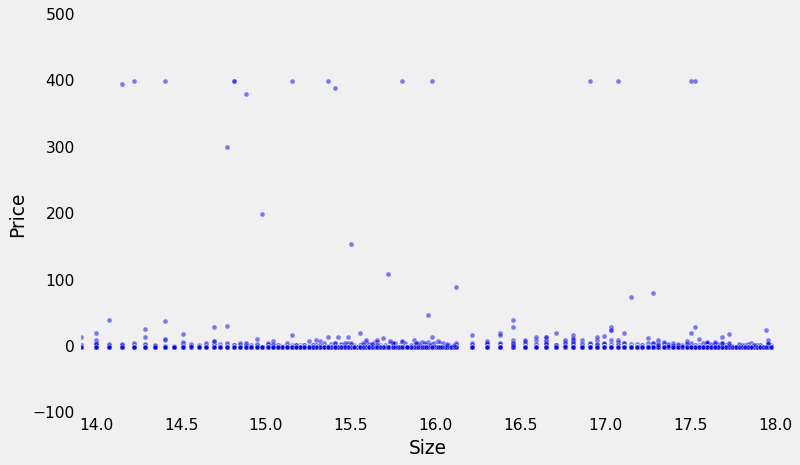

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(x,y,alpha=0.5)
plt.xlim(13.9,18)
plt.grid()
plt.ylabel('Price')
plt.xlabel('Size')

<font color='green'> Zooming in the above scatter plot, to better understand if there is any relation between price and size of app </font>

Text(0.5, 0, 'Size')

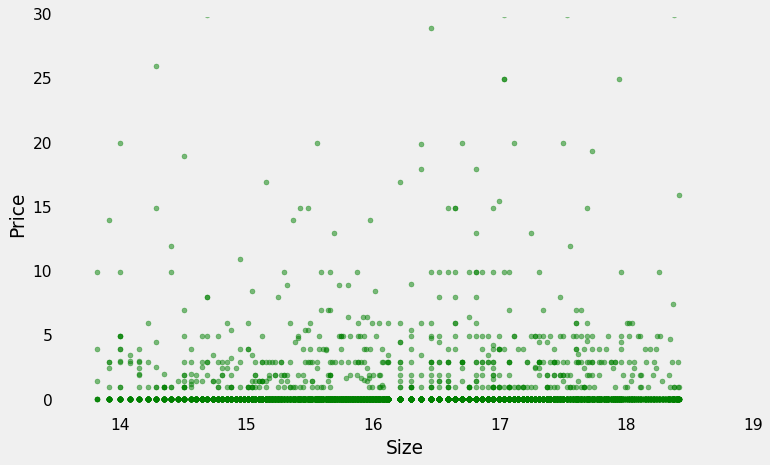

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='green',alpha=0.5)
plt.xlim(13.5,19)
plt.ylim(-1,30)
plt.grid()
plt.ylabel('Price')
plt.xlabel('Size')

<font color='green'>**As we can see from the above graph, most of the Apps are free as price is $0, and the rest of the scattered data, do not show any linear, quadratic, logarithmic relation among the data.** </font>


##### Exercise 2: Find the popular app categories based on rating and no. of installs

**Hint:** [df.groupby.agg()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html); Taking the average rating could be another approach

In [38]:
# YOUR CODE HERE
#############################################################################
# Steps
# 1. Replace '+' in string df['Installs']
# 2. Replace ',' in string df['Installs']
# 3. Use df.groupby.agg() as mentioned in the hint.
# 4. Add aggregates of  2 columns 'Rating' & 'Installs'
# 5. Sort values in descending order. 
# 6. get the table index for plot
# Visualization Links 
# https://www.codecademy.com/article/seaborn-design-ii
#############################################################################
df['Installs'].unique()
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x: int(str(x).replace(',','')))
app_rating_installs_agg_df = df.groupby(['Category']).agg({'Rating' : np.mean, 'Installs': np.sum})
#app_rating_installs_agg_df['Installs'] = app_rating_installs_agg_df['Installs'].apply(lambda x: math.log(x))
table = pd.DataFrame(app_rating_installs_agg_df.iloc[:,0] + app_rating_installs_agg_df.iloc[:,1])
table.columns = ['Total']
table = table.sort_values(by='Total',ascending=False)
index = table.index.tolist()

[]

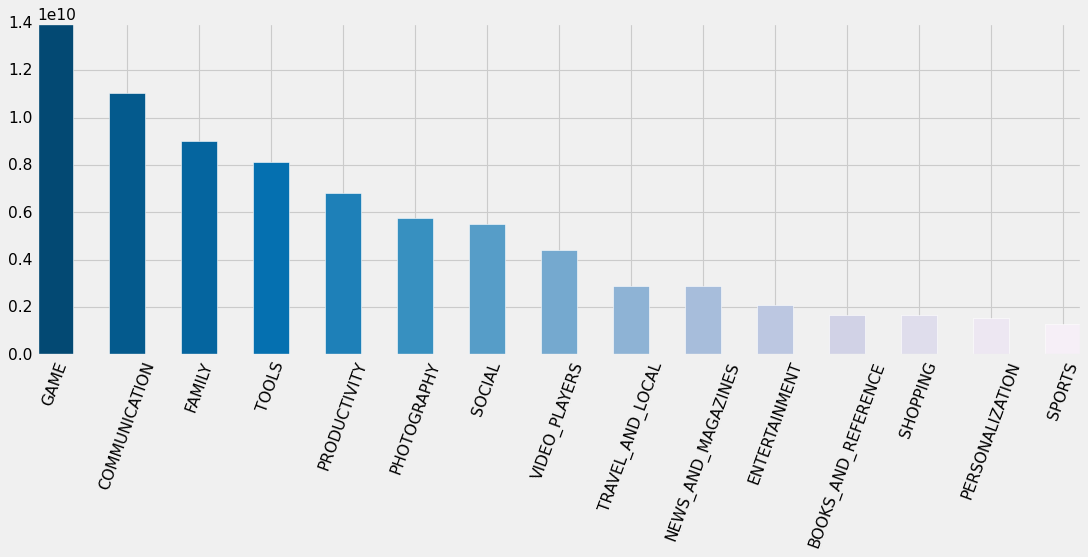

In [41]:
plt.figure(figsize = (15, 5))
#Bar plot
plt.bar(index[0:15], table.iloc[0:15,0], edgecolor='white',color = sns.color_palette('PuBu_r',15),
        width = 0.5)
plt.xticks(rotation=70)
plt.plot()

##### Exercise 3: How many apps are produced in each year category-wise ?

  * Create a `Year` column by slicing the values of `Last Updated` column and find the Year with most no. of apps produced 

    **For example**, slice the year `2017` from `February 8, 2017` 

  * Find the categories which have a consistent rating in each year

      **Hint:** `sns.countplot`

In [42]:
df['Year'] = pd.DatetimeIndex(df['Last Updated']).year

<font color='green'>**Sub-Task-1** : 
Create a Year column by slicing the values of Last Updated column and find the Year with most no. of apps produced</font>

In [43]:
print("Total Number of App produced each year :")
print(df.groupby('Year').size())
print("From visual inspection, it can be seen that, maximum number of Apps were produced in 2018")

Total Number of App produced each year :
Year
2010       1
2011      15
2012      26
2013     108
2014     203
2015     452
2016     780
2017    1802
2018    6388
dtype: int64
From visual inspection, it can be seen that, maximum number of Apps were produced in 2018


<font color='green'>**Sub-Task-2** : 
Find the categories which have a consistent rating in each year</font>

In [44]:
sub_df = df[['Category','Rating','Year']].groupby(['Category','Year']).agg({'Rating' : np.mean}).unstack().reset_index()
sub_df.head()

Category Rating                                          \
Year                        2010 2011 2012      2013      2014      2015   
0          ART_AND_DESIGN    NaN  NaN  NaN       NaN       NaN       NaN   
1       AUTO_AND_VEHICLES    NaN  NaN  NaN       NaN  4.000000       NaN   
2                  BEAUTY    NaN  NaN  NaN       NaN       NaN       NaN   
3     BOOKS_AND_REFERENCE    NaN  4.1  NaN  4.264045  4.353808  4.432731   
4                BUSINESS    NaN  3.1  3.3  3.866089  3.031636  3.974120   

                                    
Year      2016      2017      2018  
0          NaN  4.446577  4.333664  
1     4.100000  4.411546  4.175731  
2     3.900000  4.326190  4.273750  
3     4.334457  4.284137  4.361954  
4     3.894372  4.106194  4.188671

In [45]:
sub_df.columns.get_level_values(1)
sub_df.columns.get_level_values(0)
# Change Multiindex columns to standard columns
# By just renaming the column names
sub_df.columns = ['Category','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [46]:
sub_df.head()

,Category,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ART_AND_DESIGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.446577,4.333664
1,AUTO_AND_VEHICLES,NaN,NaN,NaN,NaN,4.000000,NaN,4.100000,4.411546,4.175731
2,BEAUTY,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,4.326190,4.273750
3,BOOKS_AND_REFERENCE,NaN,4.1,NaN,4.264045,4.353808,4.432731,4.334457,4.284137,4.361954
4,BUSINESS,NaN,3.1,3.3,3.866089,3.031636,3.974120,3.894372,4.106194,4.188671


In [47]:
# Checking isNan for each column of sub_df
print(sub_df.isna().sum())
print("As we can see 2016,2017 and 2018 years can given us relevant insight to answer the given question")
print(" We retain three columns to proceed ahead.")
sub_df = sub_df[['Category','2016','2017','2018']]

Category     0
2010        32
2011        26
2012        21
2013        11
2014        11
2015         7
2016         1
2017         0
2018         0
dtype: int64
As we can see 2016,2017 and 2018 years can given us relevant insight to answer the given question
 We retain three columns to proceed ahead.


In [48]:
# filling the value of Nan
sub_df.loc[0,'2016'] = 0
print(sub_df.head())
sub_df.index = sub_df.loc[:,'Category']

              Category      2016      2017      2018
0       ART_AND_DESIGN  0.000000  4.446577  4.333664
1    AUTO_AND_VEHICLES  4.100000  4.411546  4.175731
2               BEAUTY  3.900000  4.326190  4.273750
3  BOOKS_AND_REFERENCE  4.334457  4.284137  4.361954
4             BUSINESS  3.894372  4.106194  4.188671


Text(0, 0.5, 'Ratings')

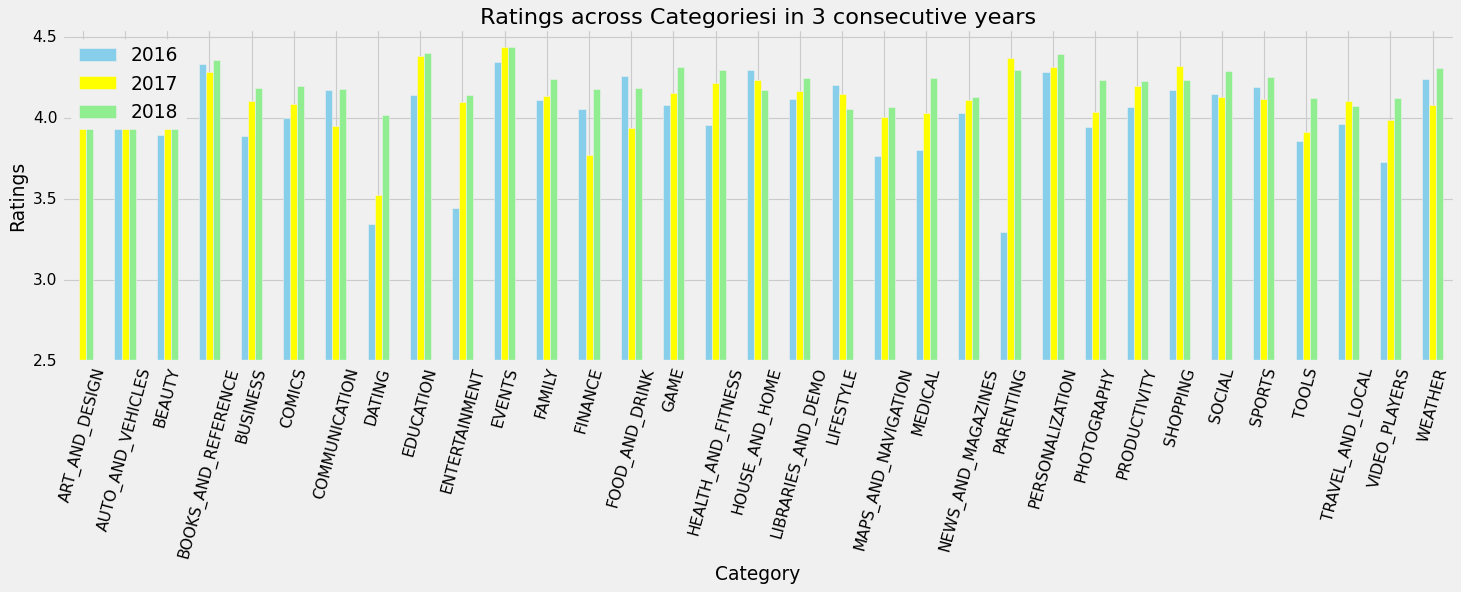

In [49]:
sub_df.plot(kind="bar",color=['skyblue','yellow','lightgreen'],figsize=(20, 5))
plt.xticks(rotation=75)
plt.title("Ratings across Categoriesi in 3 consecutive years")
plt.ylim(2.5,4.55)
plt.xlabel("Category")
plt.ylabel("Ratings")

<font color='green'>We can further, refine the above plot, to select only those categories, where the difference between latest ratings between 2017 & 2018 is not more than 0.2</font>

In [50]:
sub_df = sub_df[abs(sub_df.iloc[:,-1] - sub_df.iloc[:,-2]) < 0.05]

In [51]:
sub_df = sub_df.drop(['2016'],axis=1)

In [52]:
sub_df

,Category,2017,2018
Category,,,
EDUCATION,EDUCATION,4.388462,4.406701
ENTERTAINMENT,ENTERTAINMENT,4.100000,4.142105
EVENTS,EVENTS,4.438333,4.438309
NEWS_AND_MAGAZINES,NEWS_AND_MAGAZINES,4.111601,4.133019
PRODUCTIVITY,PRODUCTIVITY,4.197311,4.233476
TRAVEL_AND_LOCAL,TRAVEL_AND_LOCAL,4.110089,4.077151


Text(0, 0.5, 'Ratings')

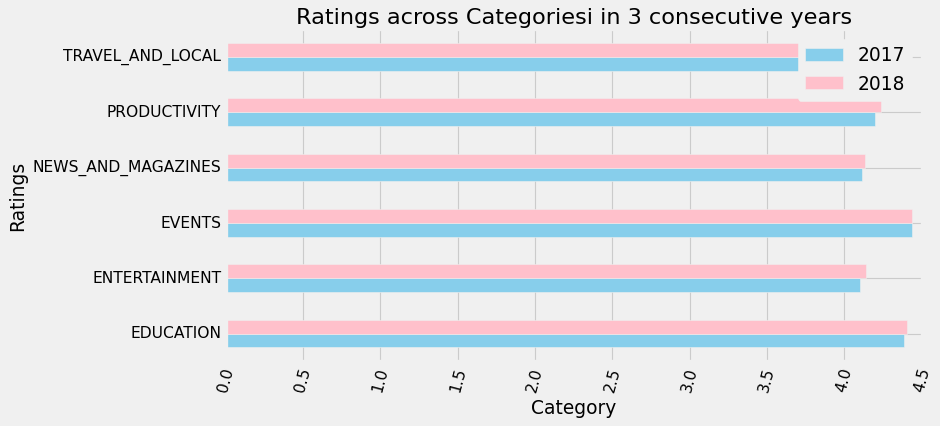

In [53]:
sub_df.plot(kind="barh",color=['skyblue','pink'],figsize=(10,5))
plt.xticks(rotation=75)
plt.title("Ratings across Categoriesi in 3 consecutive years")
plt.xlabel("Category")
plt.ylabel("Ratings")

In [55]:
# Since ratings are not integers and differs in float point value
# hence, didnt use countplot.
#sns.countplot(x ='Category', hue = "Rating", data = df)

##### Exercise 4: Identify the highest paid apps with a good rating

In [57]:
# YOUR CODE HERE
# Going back to our main dataframe and filtering out only the paid apps
df['Price'] = df['Price'].apply(lambda x: float(str(x).replace('$',''))if '$' in str(x) else 0.1)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x: int(str(x).replace(',','')))
sub_df = df[df['Type'] == 'Paid']
# filter Apps based on amount paid and rating
sub_df = sub_df.sort_values(by=['Rating','Price'],ascending=False)

In [58]:
print("Total Paid Apps filters",len(sub_df))
print("The highest rated Paid App : ",np.max(sub_df.loc[:,'Rating']))
print("Average rating of the paid Apps :",np.mean(sub_df.loc[:,'Rating']))

Total Paid Apps filters 757
The highest rated Paid App :  5.0
Average rating of the paid Apps : 4.251542779026808


<font color='green'> 
Analysis:
1. Total "Paid" Apps are 757.
2. And half of them have Ratings above 4.2 ~ 377
3. Now, to filter and display the highest paid apps with a good rating, depends on our cut-off of the rating threshold, above which we can say they are good apps. 
We go by the following logic, 
- If   rating == 5 + "Paid" App, then we identify those apps as "Highest Paid Apps with a good Rating."</font>


In [59]:
sub_df = sub_df[sub_df["Rating"] == 5.0]
print("Total Paid Apps with full rating :",len(sub_df))
# Getting the top 5 of the sub dataframe
sub_df[['App','Rating','Installs','Type','Price']].head()

Total Paid Apps with full rating : 28


,App,Rating,Installs,Type,Price
5966,BC MVA Fines,5.0,50,Paid,0.1
8287,AC DC Power Monitor,5.0,10,Paid,0.1
7477,USMLE Step 2 CK Flashcards,5.0,10,Paid,0.1
7377,CI 174 Gray Icon Pack,5.0,10,Paid,0.1
8018,30WPM Amateur ham radio Koch CW Morse code tra...,5.0,10,Paid,0.1


##### Exercise 5: Are the top-rated apps genuine ? How about checking reviews count of top-rated apps ?

In [81]:
# YOUR CODE HERE
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
sub_df = df[df['Rating'] > 4.5]
print(type(sub_df))

<class 'pandas.core.frame.DataFrame'>


In [82]:
sub_df = sub_df[sub_df['Reviews']> 500]
sub_df = sub_df.sort_values(by=['Rating','Reviews'],ascending=False)
# genuine Top Rated Apps
sub_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752,0.1,10000000,Free,0.1,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device,2018
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13000000.0,10000000,Free,0.1,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up,2018
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38000000.0,1000000,Free,0.1,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up,2018
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26000000.0,1000000,Free,0.1,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up,2018
2344,Period Tracker,MEDICAL,4.9,100082,3700000.0,1000000,Free,0.1,Everyone,Medical,"July 9, 2018",1.2.2,4.1 and up,2018


##### Exercise 6: If the number of reviews of an app is very low, what could be the reason for its top-rating ?

In [ ]:
# YOUR CODE HERE
